# How to create calculated columns in a dataframe

- qts algo
- yt https://www.youtube.com/channel/UCE3Acd2jWH6BlXlCYOz4PFQ

In [1]:
import pandas as pd
import numpy as np

In [2]:
ts = pd.read_csv('time_and_sales.csv')

In [3]:
ts.shape

(18888, 10)

df.head()

### Add calculated columns using a for loop

In [4]:
for ind, row in ts.iterrows():
    ts.loc[ind,"bid_ask_mi_pd"] = (row['BID']+row['ASK'])/ 2
    ts.loc[ind,"bid_ask_spread_pd"] = row['ASK']-row['BID']


In [5]:
ts.head()

,TIMESTAMP,BIC,PRICE,SIZE,VWAP,BID,ASK,BID_SIZE,ASK_SIZE,SEQ_NO,bid_ask_mi_pd,bid_ask_spread_pd
0,2022-04-20 00:14:59.967,dax,14221,3,42663,14231,14231,1,1,1,14231.0,0.0
1,2022-04-20 00:15:00.335,dax,14208,8,113664,14201,14212,5,1,2,14206.5,11.0
2,2022-04-20 00:15:01.469,dax,14212,2,28424,14201,14212,2,1,3,14206.5,11.0
3,2022-04-20 00:15:02.021,dax,14211,1,14211,14202,14215,1,1,4,14208.5,13.0
4,2022-04-20 00:15:03.750,dax,14210,2,28420,14212,14217,1,1,5,14214.5,5.0


In [6]:
ts.shape

(18888, 12)

## Add calculated columns using the apply function (np.log)
using numpy functions

In [7]:
ts['price_log_np']=ts['PRICE'].apply(np.log)


In [8]:
ts.head()

,TIMESTAMP,BIC,PRICE,SIZE,VWAP,BID,ASK,BID_SIZE,ASK_SIZE,SEQ_NO,bid_ask_mi_pd,bid_ask_spread_pd,price_log_np
0,2022-04-20 00:14:59.967,dax,14221,3,42663,14231,14231,1,1,1,14231.0,0.0,9.562475
1,2022-04-20 00:15:00.335,dax,14208,8,113664,14201,14212,5,1,2,14206.5,11.0,9.561560
2,2022-04-20 00:15:01.469,dax,14212,2,28424,14201,14212,2,1,3,14206.5,11.0,9.561842
3,2022-04-20 00:15:02.021,dax,14211,1,14211,14202,14215,1,1,4,14208.5,13.0,9.561772
4,2022-04-20 00:15:03.750,dax,14210,2,28420,14212,14217,1,1,5,14214.5,5.0,9.561701


In [9]:
ts.shape

(18888, 13)

## Add cumalative columns .cumsum()

In [10]:
ts['cum_size'] =ts['SIZE'].cumsum()

In [11]:
ts.head()

,TIMESTAMP,BIC,PRICE,SIZE,VWAP,BID,ASK,BID_SIZE,ASK_SIZE,SEQ_NO,bid_ask_mi_pd,bid_ask_spread_pd,price_log_np,cum_size
0,2022-04-20 00:14:59.967,dax,14221,3,42663,14231,14231,1,1,1,14231.0,0.0,9.562475,3
1,2022-04-20 00:15:00.335,dax,14208,8,113664,14201,14212,5,1,2,14206.5,11.0,9.561560,11
2,2022-04-20 00:15:01.469,dax,14212,2,28424,14201,14212,2,1,3,14206.5,11.0,9.561842,13
3,2022-04-20 00:15:02.021,dax,14211,1,14211,14202,14215,1,1,4,14208.5,13.0,9.561772,14
4,2022-04-20 00:15:03.750,dax,14210,2,28420,14212,14217,1,1,5,14214.5,5.0,9.561701,16


##  Plot values

In /home/jamie/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jamie/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jamie/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jamie/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jamie/anaconda3/lib/python3.9/site-packages/matplotlib/

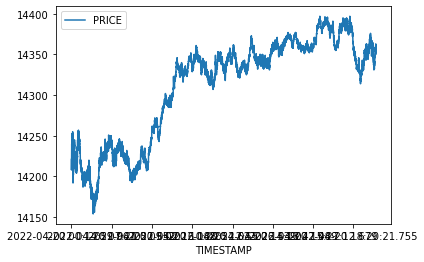

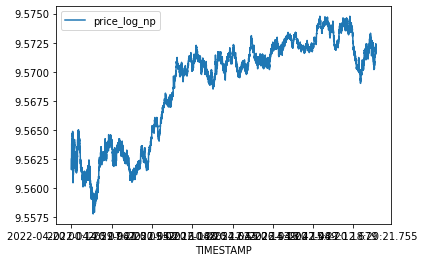

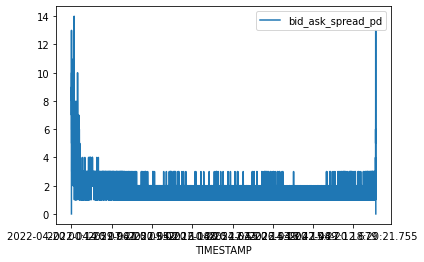

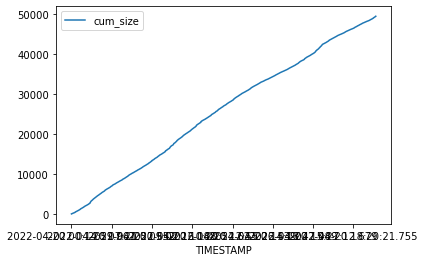

In [12]:
ts.plot.line(x='TIMESTAMP',y='PRICE');
ts.plot.line(x='TIMESTAMP',y='price_log_np');
ts.plot.line(x='TIMESTAMP',y='bid_ask_spread_pd');
ts.plot.line(x='TIMESTAMP',y='cum_size');

## Add moving (rolling) average

In [13]:
ts['sma_250'] = ts['PRICE'].rolling(250).mean()
ts['sma_500'] = ts['PRICE'].rolling(500).mean()
ts['sma_1500'] = ts['PRICE'].rolling(1500).mean()
ts['sma_3500'] = ts['PRICE'].rolling(3500).mean()
ts['sma_5500'] = ts['PRICE'].rolling(5500).mean()

In [14]:
ts.head()


,TIMESTAMP,BIC,PRICE,SIZE,VWAP,BID,ASK,BID_SIZE,ASK_SIZE,SEQ_NO,bid_ask_mi_pd,bid_ask_spread_pd,price_log_np,cum_size,sma_250,sma_500,sma_1500,sma_3500,sma_5500
0,2022-04-20 00:14:59.967,dax,14221,3,42663,14231,14231,1,1,1,14231.0,0.0,9.562475,3,NaN,NaN,NaN,NaN,NaN
1,2022-04-20 00:15:00.335,dax,14208,8,113664,14201,14212,5,1,2,14206.5,11.0,9.561560,11,NaN,NaN,NaN,NaN,NaN
2,2022-04-20 00:15:01.469,dax,14212,2,28424,14201,14212,2,1,3,14206.5,11.0,9.561842,13,NaN,NaN,NaN,NaN,NaN
3,2022-04-20 00:15:02.021,dax,14211,1,14211,14202,14215,1,1,4,14208.5,13.0,9.561772,14,NaN,NaN,NaN,NaN,NaN
4,2022-04-20 00:15:03.750,dax,14210,2,28420,14212,14217,1,1,5,14214.5,5.0,9.561701,16,NaN,NaN,NaN,NaN,NaN


## Add moving (rolling) average and median

<AxesSubplot:xlabel='TIMESTAMP'>

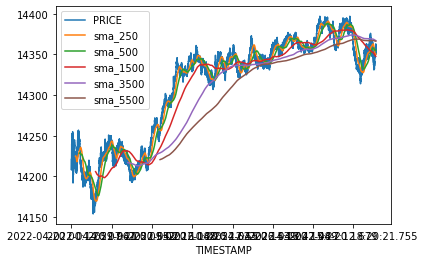

In [15]:
ts.plot.line(x='TIMESTAMP',y=['PRICE','sma_250','sma_500','sma_1500','sma_3500','sma_5500'])

In [16]:
ts['men_5000'] = ts['PRICE'].rolling(5000).mean()
ts['med_5000'] = ts['PRICE'].rolling(5000).median()

<AxesSubplot:xlabel='TIMESTAMP'>

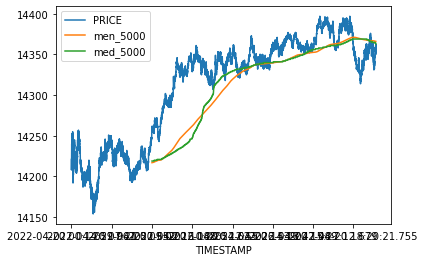

In [17]:
ts.plot.line(x='TIMESTAMP',y=['PRICE','men_5000','med_5000'])